# About

ACF(自己相関関数), PACF(偏自己相関関数)は時系列データの素性を確認する上で重要。

書籍ではRでのコード例が掲載されていたため、ここではPythonのコード例を作成してみる。

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.5)
c_list = sns.color_palette().as_hex()
color_num = len(c_list)

`statsmodels`を利用する。別途インストール必要。（Docker利用するなら、`jupyter/datascience-notebook`imageにはインストール済みなので楽ちん）

In [2]:
import statsmodels.api as sm

まずは正弦波から。

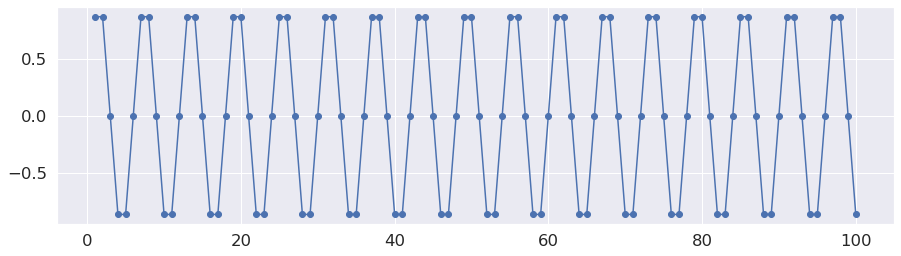

In [3]:
x = np.linspace(1, 100, 100)
y = np.sin(x * np.pi / 3.)

fig = plt.figure(figsize=(15, 4))
ax = fig.subplots(1, 1)
ax.plot(x, y, "-o");

自己相関を求める

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html

https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html?highlight=plot_acf

In [4]:
sin_acf = sm.tsa.stattools.acf(y, nlags=40, fft=False) # FFT?フーリエ変換？
sin_acf

array([ 1.        ,  0.49246007, -0.49261382, -0.97014928, -0.47753993,
        0.47767577,  0.94028064,  0.46259591, -0.46276758, -0.91044783,
       -0.44769369,  0.44781161,  0.88056128,  0.43273175, -0.43292133,
       -0.85074638, -0.41784744,  0.41794745,  0.82084192,  0.40286759,
       -0.40307509, -0.79104493, -0.38800119,  0.3880833 ,  0.76112256,
        0.37300343, -0.37322884, -0.73134348, -0.35815495,  0.35821914,
        0.70140319,  0.34313927, -0.34338259, -0.67164204, -0.3283087 ,
        0.32835498,  0.64168383,  0.31327512, -0.31353635, -0.61194059,
       -0.29846246])

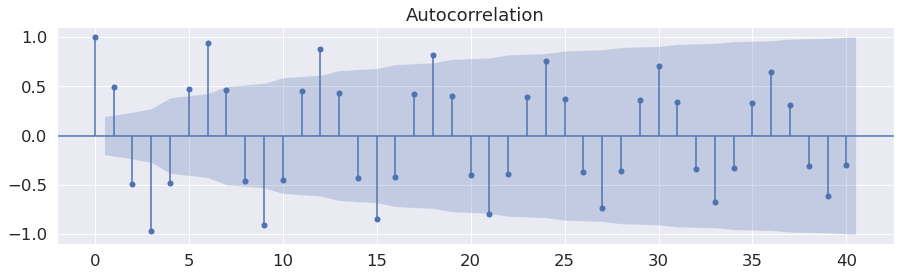

In [5]:
fig = plt.figure(figsize=(15, 4))
ax = fig.subplots(1, 1)
sm.graphics.tsa.plot_acf(y, lags=40, fft=False, ax=ax);

偏自己相関

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf.html

https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html?highlight=plot_pacf

Rの`pacf`関数は、

```
The algorithm of Durbin is used (see Box and Jenkins (1976), p. 65).
```

と書かれていて、具体的な計算式については追えていない(See [Document](https://www.rdocumentation.org/packages/tseries/versions/0.1-2/topics/pacf))。以下では、`Levinson-Durbin recursion without bias correction.`というメソッドを指定した。

In [6]:
sin_pacf = sm.tsa.stattools.pacf(y, method="ldb", nlags=40)
sin_pacf

array([ 1.00000000e+00,  4.92460069e-01, -9.70491303e-01, -3.22269316e-01,
       -1.23160810e-01, -5.55878292e-02, -2.86814728e-02, -1.02073449e-02,
        3.99018556e-03,  8.31048105e-03,  1.60523210e-03, -8.29220901e-03,
       -1.10634009e-02, -3.75586739e-03,  6.36494215e-03,  9.08127367e-03,
        1.49264680e-03, -8.98072307e-03, -1.19416642e-02, -4.43484870e-03,
        6.00511896e-03,  8.81034502e-03,  9.73227084e-04, -9.84735120e-03,
       -1.29083112e-02, -5.14974182e-03,  5.64601207e-03,  8.55214476e-03,
        4.51789687e-04, -1.07394693e-02, -1.39078945e-02, -5.88073447e-03,
        5.29547474e-03,  8.30979321e-03, -7.23940656e-05, -1.16612672e-02,
       -1.49458931e-02, -6.63173725e-03,  4.95223518e-03,  8.08289713e-03,
       -6.01704890e-04])

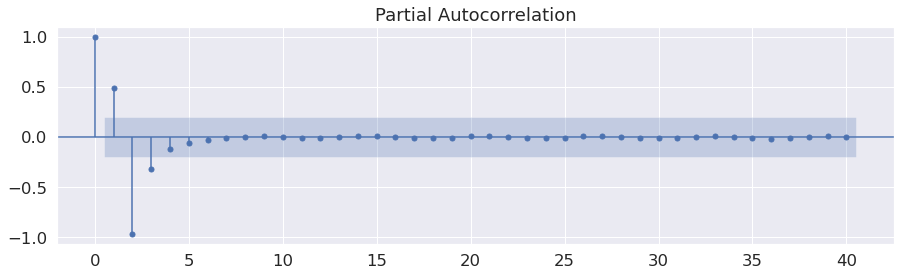

In [7]:
fig = plt.figure(figsize=(15, 4))
ax = fig.subplots(1, 1)
sm.graphics.tsa.plot_pacf(y, lags=40, method="ldb", ax=ax);